# Análise os Dados com Pandas

In [1]:
# PANDAS-PRINT-MATPLOTLIB
import pandas as pd

In [2]:
df = pd.read_csv('data\\salaries.csv')

In [3]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  object 
 2   employment_type     133349 non-null  object 
 3   job_title           133349 non-null  object 
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  object 
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  object 
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  object 
 10  company_size        133349 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB


In [5]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,133339.000000,1.333490e+05,133349.000000,133349.000000
mean,2024.358770,1.632833e+05,157617.272098,20.905669
std,0.680627,2.173860e+05,74288.363097,40.590044
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060200e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146206.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [6]:
df.shape

(133349, 11)

In [7]:
linhas, colunas = df.shape
print(f'A base de dados possui {linhas} linhas e {colunas} colunas.')

A base de dados possui 133349 linhas e 11 colunas.


In [8]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

### Renomeando as colunas do DataFrame

In [9]:
# Dicionário de renomeação
novos_nomes = {
    'work_year': 'ano',
    'experience_level': 'senioridade',
    'employment_type': 'contrato',
    'job_title': 'cargo',
    'salary': 'salario',
    'salary_currency': 'moeda',
    'salary_in_usd': 'usd',
    'employee_residence': 'residencia',
    'remote_ratio': 'remoto',
    'company_location': 'empresa',
    'company_size': 'tamanho_empresa'
}

# Renomeando as colunas
df.rename(columns=novos_nomes, inplace=True)

# Verificando as novas colunas
df.columns

Index(['ano', 'senioridade', 'contrato', 'cargo', 'salario', 'moeda', 'usd',
       'residencia', 'remoto', 'empresa', 'tamanho_empresa'],
      dtype='object')

### Analisando quais sãos as categorias das colunas categóricas

#### Nível de senioridade

In [10]:
# O método .value_counts() serve para contar quantas vezes cada valor único aparece em uma coluna.
df['senioridade'].value_counts()

senioridade
SE    77241
MI    40465
EN    12443
EX     3200
Name: count, dtype: int64

#### Tipo de contrato

In [11]:
df['contrato'].value_counts()

contrato
FT    132563
CT       394
PT       376
FL        16
Name: count, dtype: int64

#### Regime de trabalho

In [12]:
df['remoto'].value_counts()

remoto
0      105312
100     27718
50        319
Name: count, dtype: int64

#### Tamanho da empresa

In [13]:
df['tamanho_empresa'].value_counts()

tamanho_empresa
M    129561
L      3574
S       214
Name: count, dtype: int64

#### Modificando o nome das categorias:

In [14]:
senioridade = {
    'SE': 'senior',
    'MI': 'pleno',
    'EN': 'junior',
    'EX': 'executivo'
}

df['senioridade'] = df['senioridade'].map(senioridade)
df['senioridade'].value_counts()

senioridade
senior       77241
pleno        40465
junior       12443
executivo     3200
Name: count, dtype: int64

In [15]:
contrato = {
    'FT': 'integral',
    'PT': 'parcial',
    'CT': 'contrato',
    'FL': 'freelancer'
}

df['contrato'] = df['contrato'].map(contrato)
df['contrato'].value_counts()

contrato
integral      132563
contrato         394
parcial          376
freelancer        16
Name: count, dtype: int64

In [16]:
tamanho_empresa = {
    'L': 'grande',
    'S': 'pequena',
    'M':	'media'

}

df['tamanho_empresa'] = df['tamanho_empresa'].map(tamanho_empresa)
df['tamanho_empresa'].value_counts()

tamanho_empresa
media      129561
grande       3574
pequena       214
Name: count, dtype: int64

In [17]:
mapa_trabalho = {
    0: 'presencial',
    100: 'remoto',
    50: 'hibrido'
}

df['remoto'] = df['remoto'].map(mapa_trabalho)
df['remoto'].value_counts()

remoto
presencial    105312
remoto         27718
hibrido          319
Name: count, dtype: int64

In [18]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,senior,integral,Solutions Engineer,214000,USD,214000,US,remoto,US,media
1,2025.0,senior,integral,Solutions Engineer,136000,USD,136000,US,remoto,US,media
2,2025.0,pleno,integral,Data Engineer,158800,USD,158800,AU,presencial,AU,media
3,2025.0,pleno,integral,Data Engineer,139200,USD,139200,AU,presencial,AU,media
4,2025.0,junior,integral,Data Engineer,90000,USD,90000,US,presencial,US,media


In [19]:
df.describe(include='object')

,senioridade,contrato,cargo,moeda,residencia,remoto,empresa,tamanho_empresa
count,133349,133349,133349,133349,133349,133349,133349,133349
unique,4,4,390,26,102,3,95,3
top,senior,integral,Data Scientist,USD,US,presencial,US,media
freq,77241,132563,17314,126140,119579,105312,119641,129561


# Preparação e limpeza dos Dados

In [20]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,senior,integral,Solutions Engineer,214000,USD,214000,US,remoto,US,media
1,2025.0,senior,integral,Solutions Engineer,136000,USD,136000,US,remoto,US,media
2,2025.0,pleno,integral,Data Engineer,158800,USD,158800,AU,presencial,AU,media
3,2025.0,pleno,integral,Data Engineer,139200,USD,139200,AU,presencial,AU,media
4,2025.0,junior,integral,Data Engineer,90000,USD,90000,US,presencial,US,media


In [21]:
df.isnull()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
133344,False,False,False,False,False,False,False,False,False,False,False
133345,False,False,False,False,False,False,False,False,False,False,False
133346,False,False,False,False,False,False,False,False,False,False,False
133347,False,False,False,False,False,False,False,False,False,False,False


In [22]:
df.isnull().sum()

ano                10
senioridade         0
contrato            0
cargo               0
salario             0
moeda               0
usd                 0
residencia          0
remoto              0
empresa             0
tamanho_empresa     0
dtype: int64

In [23]:
df['ano'].unique()

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

In [24]:
df[df.isnull().any(axis=1)]

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
5588,NaN,senior,integral,Product Manager,184500,USD,184500,US,presencial,US,media
59692,NaN,pleno,integral,Engineer,110000,USD,110000,DE,presencial,DE,media
59710,NaN,junior,integral,Data Scientist,208800,USD,208800,US,presencial,US,media
59759,NaN,senior,integral,Software Engineer,135000,USD,135000,US,presencial,US,media
59789,NaN,senior,integral,Engineer,112000,USD,112000,US,presencial,US,media
131000,NaN,senior,integral,Machine Learning Engineer,163800,USD,163800,US,presencial,US,media
131006,NaN,senior,integral,Data Analytics Manager,204500,USD,204500,US,presencial,US,media
133054,NaN,junior,integral,Data Scientist,40000,USD,40000,JP,remoto,MY,grande
133281,NaN,pleno,integral,Machine Learning Engineer,180000,PLN,46597,PL,remoto,PL,grande
133317,NaN,pleno,integral,Data Scientist,130000,USD,130000,US,hibrido,US,grande


In [25]:
# 1. Preenchimento com Valores Derivados (Imputation)
# Para salario: Usar a mediana ou média do salário da mesma categoria, senioridade e país.

# 2. Remover Linhas com Dados Faltantes
# Caso a quantidade de dados nulos seja muito pequena (como neste caso, apenas 5 linhas), você pode simplesmente removê-las.

# 3. Inferência e Preenchimento com Regras de Negócio
# Preencher com base em regras claras.

#### Exemplos fictícios

#### Exemplo de preenchimento com média e mediana

In [26]:
import numpy as np

df_salarios = pd.DataFrame({
    'nome': ['Ana', 'Bruno', 'Carlos', 'Diana', 'Eduardo'],
    'salario': [4000, 5000, np.nan, 6700, np.nan],
})
# Preenchendo valores nulos com a média do salário
df_salarios['salario_media'] = df_salarios['salario'].fillna(df_salarios['salario'].mean().round(2))

# Preenchendo valores nulos com a mediana do salário
df_salarios['salario_mediana'] = df_salarios['salario'].fillna(df_salarios['salario'].median())

df_salarios

,nome,salario,salario_media,salario_mediana
0,Ana,4000.0,4000.00,4000.0
1,Bruno,5000.0,5000.00,5000.0
2,Carlos,NaN,5233.33,5000.0
3,Diana,6700.0,6700.00,6700.0
4,Eduardo,NaN,5233.33,5000.0


#### Exemplo de preenchimento com o valor anterior

In [27]:
df_temperaturas = pd.DataFrame({
    'dia': ['segunda', 'terça', 'quarta', 'quinta', 'sexta'],
    'temperatura': [24, np.nan, np.nan, 31, 29]
})

df_temperaturas['preenchido_ffill'] = df_temperaturas['temperatura'].ffill()

df_temperaturas


,dia,temperatura,preenchido_ffill
0,segunda,24.0,24.0
1,terça,NaN,24.0
2,quarta,NaN,24.0
3,quinta,31.0,31.0
4,sexta,29.0,29.0


#### Exemplo de preenchimento com o valor posterior

In [28]:
df_temperaturas = pd.DataFrame({
    'dia': ['segunda', 'terça', 'quarta', 'quinta', 'sexta'],
    'temperatura': [24, np.nan, np.nan, 31, 29]
})

df_temperaturas['preenchido_bfill'] = df_temperaturas['temperatura'].bfill()

df_temperaturas

,dia,temperatura,preenchido_bfill
0,segunda,24.0,24.0
1,terça,NaN,31.0
2,quarta,NaN,31.0
3,quinta,31.0,31.0
4,sexta,29.0,29.0


#### Exemplo de preenchimento com valor fixo

In [29]:
df_cidades = pd.DataFrame({
    'nome': ['Ana', 'Bruno', 'Carlos', 'Diana', 'Eduardo'],
    'cidade': ['Recife', np.nan, np.nan, 'Belo Horizonte', 'Curitiba']
})

df_cidades['cidades_corridas'] = df_cidades['cidade'].fillna('não informada')

df_cidades

,nome,cidade,cidades_corridas
0,Ana,Recife,Recife
1,Bruno,NaN,não informada
2,Carlos,NaN,não informada
3,Diana,Belo Horizonte,Belo Horizonte
4,Eduardo,Curitiba,Curitiba


### Tratando o nosso DataFrame

#### Removendo os dados nulos

In [30]:
df_limpo = df.dropna()

In [31]:
df_limpo.isnull().sum()

ano                0
senioridade        0
contrato           0
cargo              0
salario            0
moeda              0
usd                0
residencia         0
remoto             0
empresa            0
tamanho_empresa    0
dtype: int64

#### Alterando o tipo de dados

In [32]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,senior,integral,Solutions Engineer,214000,USD,214000,US,remoto,US,media
1,2025.0,senior,integral,Solutions Engineer,136000,USD,136000,US,remoto,US,media
2,2025.0,pleno,integral,Data Engineer,158800,USD,158800,AU,presencial,AU,media
3,2025.0,pleno,integral,Data Engineer,139200,USD,139200,AU,presencial,AU,media
4,2025.0,junior,integral,Data Engineer,90000,USD,90000,US,presencial,US,media


In [33]:
df_limpo = df_limpo.assign(ano=df_limpo['ano'].astype('Int64'))

# Visualização de Dados

In [34]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025,senior,integral,Solutions Engineer,214000,USD,214000,US,remoto,US,media
1,2025,senior,integral,Solutions Engineer,136000,USD,136000,US,remoto,US,media
2,2025,pleno,integral,Data Engineer,158800,USD,158800,AU,presencial,AU,media
3,2025,pleno,integral,Data Engineer,139200,USD,139200,AU,presencial,AU,media
4,2025,junior,integral,Data Engineer,90000,USD,90000,US,presencial,US,media


#### Criando um gráfico com a própria biblioteca Pandas

<Axes: title={'center': 'Distribuição dos níveis de experiência'}, xlabel='senioridade'>

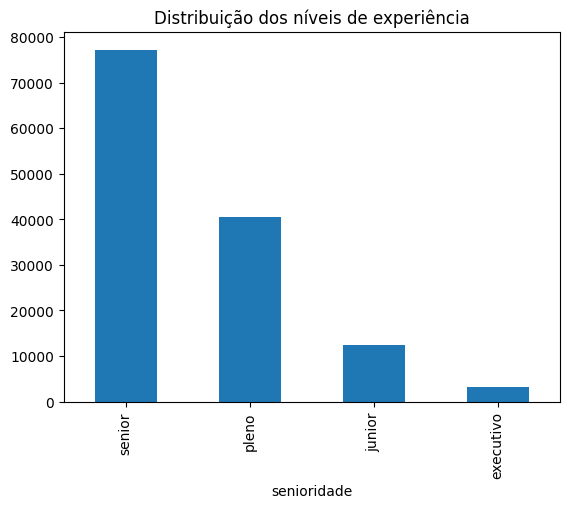

In [35]:
df_limpo['senioridade'].value_counts().plot(kind='bar', title='Distribuição dos níveis de experiência')

#### Criando o primeiro gráfico com Seaborn

In [36]:
import seaborn as sns

<Axes: xlabel='senioridade', ylabel='usd'>

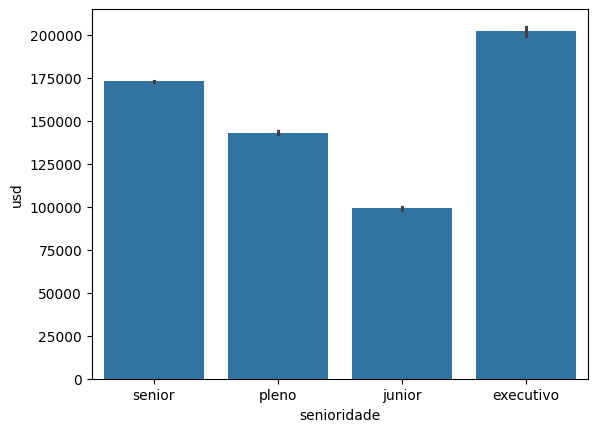

In [37]:
sns.barplot(data=df_limpo, x='senioridade', y='usd', estimator='mean')

#### Formatando o gráfico com Matplotlib

In [38]:
import matplotlib.pyplot as plt

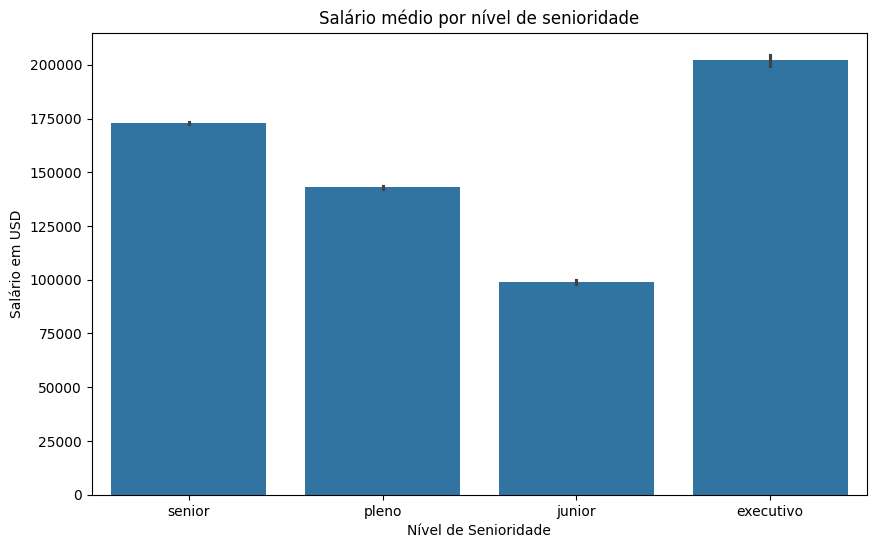

In [39]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_limpo, x='senioridade', y='usd', estimator='mean')
plt.title('Salário médio por nível de senioridade')
plt.xlabel('Nível de Senioridade')
plt.ylabel('Salário em USD')
plt.show()


#### Ordenando as categorias do maior para o menor valor:
Dica: Ordenar um gráfico de colunas do maior para o menor valor torna a visualização mais clara e eficiente, pois facilita a comparação entre categorias, destaca rapidamente os dados mais relevantes e melhora a legibilidade geral do gráfico. Essa organização permite que o público identifique com facilidade os maiores e menores valores, perceba padrões e compreenda a mensagem central dos dados com menos esforço visual.

In [40]:
df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False)

senioridade
executivo    202027.667813
senior       172850.838301
pleno        143044.845979
junior        99034.963267
Name: usd, dtype: float64

In [41]:
oredered = df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=True).index
oredered

Index(['junior', 'pleno', 'senior', 'executivo'], dtype='object', name='senioridade')

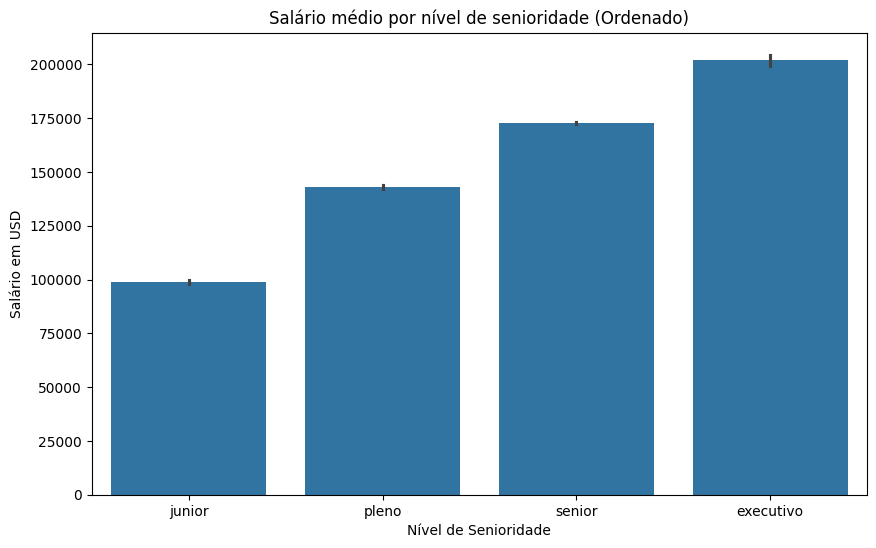

In [42]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_limpo, x='senioridade', y='usd', estimator='mean', order=oredered)
plt.title('Salário médio por nível de senioridade (Ordenado)')
plt.xlabel('Nível de Senioridade')
plt.ylabel('Salário em USD')
plt.show()


#### Analisando a distribuição dos salários

##### Histograma

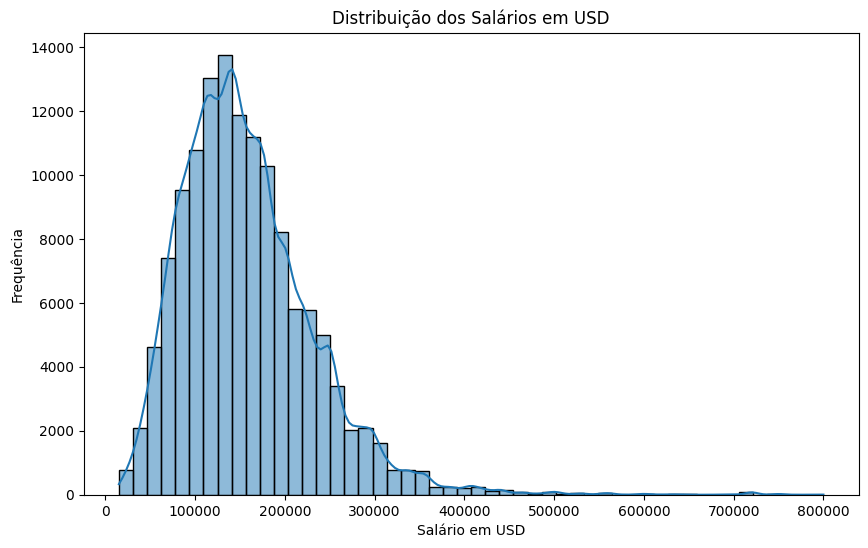

In [43]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_limpo['usd'], bins=50, kde=True)
plt.title('Distribuição dos Salários em USD')
plt.xlabel('Salário em USD')
plt.ylabel('Frequência')
plt.show()

##### Boxplot

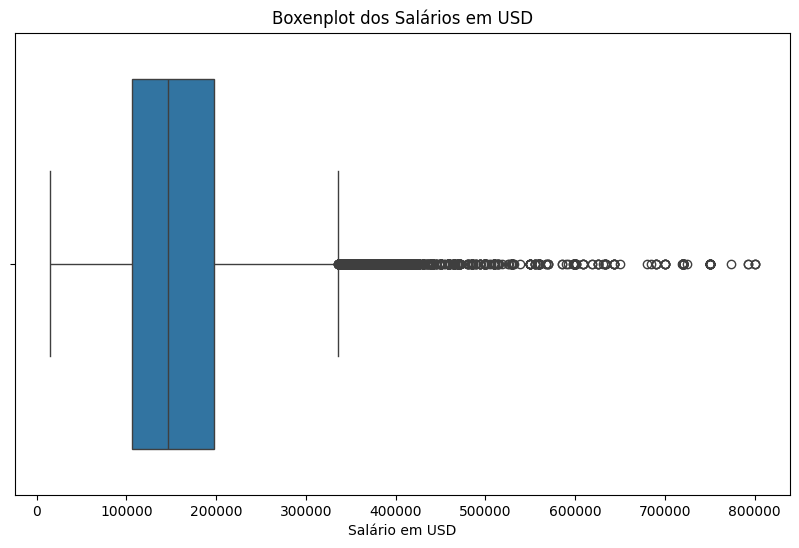

In [44]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_limpo['usd'])
plt.title('Boxenplot dos Salários em USD')
plt.xlabel('Salário em USD')
plt.show()

##### Como é a distribuição dos salários de acordo com níveis de senioridade?

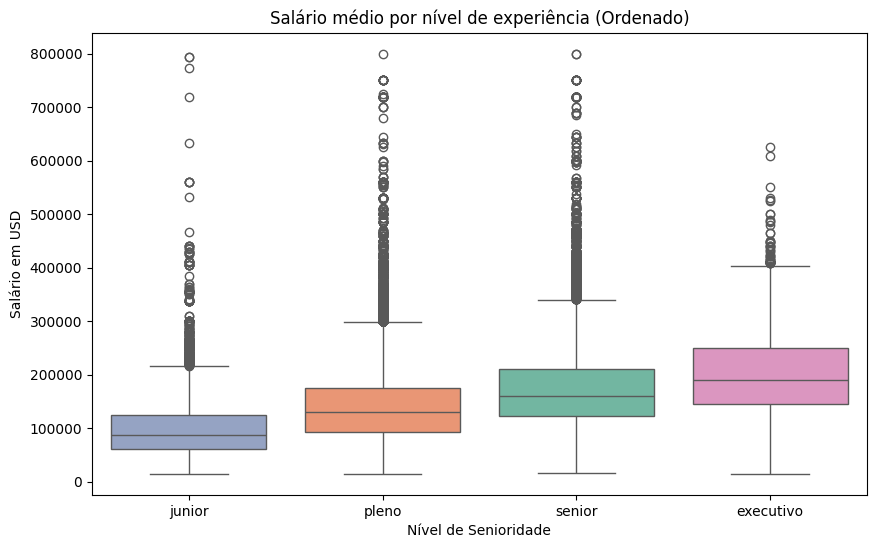

In [45]:
ordered_seniority = ['junior', 'pleno', 'senior', 'executivo']

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='senioridade', y='usd', order=ordered_seniority, palette='Set2', hue='senioridade')
plt.title('Salário médio por nível de experiência (Ordenado)')
plt.xlabel('Nível de Senioridade')
plt.ylabel('Salário em USD')
plt.show()

##### Qual país paga o maior média salarial para cientistas de dados especificamente?

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_6444\2487740364.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_ds.head(5), x='residencia', y='usd', palette='viridis')


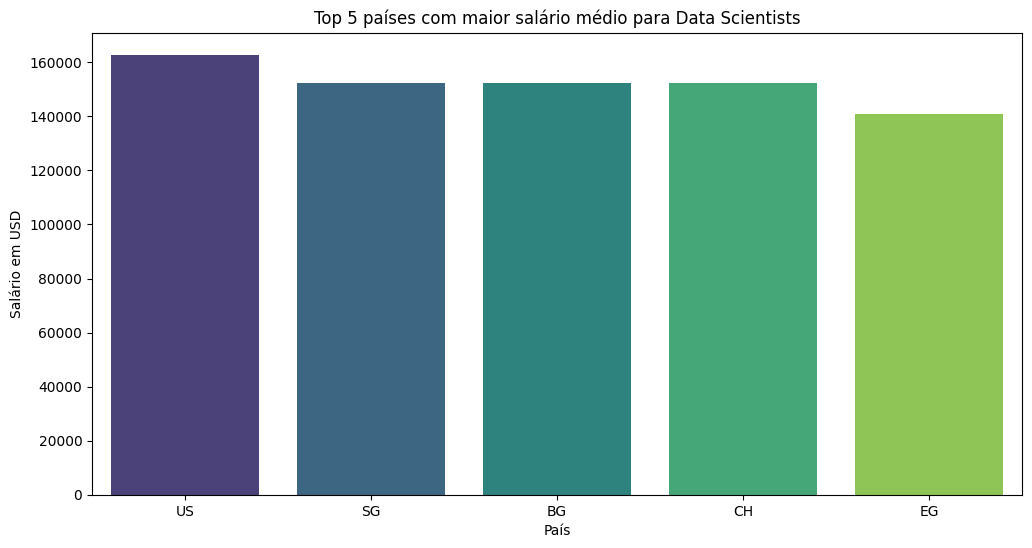

In [46]:
df_ds = df_limpo[df_limpo['cargo'] == 'Data Scientist']
mean_ds = df_ds.groupby('residencia')['usd'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=mean_ds.head(5), x='residencia', y='usd', palette='viridis')
plt.title('Top 5 países com maior salário médio para Data Scientists')
plt.xlabel('País')
plt.ylabel('Salário em USD')
plt.show()

### Criando gráficos interativos com Plotly

In [47]:
import plotly.express as px

##### Qual país paga o maior média salarial para cientistas de dados especificamente?

In [48]:
# Calcular média salarial
media_senioridade = df.groupby('senioridade')['usd'].mean().reset_index()

# Criar gráfico interativo
fig = px.bar(media_senioridade, x='senioridade', y='usd', title='Salário médio por nível de senioridade', labels={'usd': 'Salário em USD', 'senioridade': 'Nível de Senioridade'})
fig.update_layout(xaxis={'categoryorder': 'total ascending'})
fig.show()

##### Qual é a proporção dos tipos de trabalho?

In [49]:
remoto_counts = df_limpo['remoto'].value_counts().reset_index()
remoto_counts.columns = ['tipo_trabalho', 'contagem']

fig = px.pie(remoto_counts, names='tipo_trabalho', values='contagem', title='Proporção dos Tipos de Trabalho', hole=0.5)
fig.update_traces(textinfo='percent+label')
fig.show()

##### Qual é o Top 5 de melhores médias salariais por cargo?

In [50]:
top_cargos = df_limpo.groupby('cargo')['usd'].mean().sort_values(ascending=False).head(5).reset_index()
top_cargos

,cargo,usd
0,Research Team Lead,450000.0
1,Analytics Engineering Manager,399880.0
2,Data Science Tech Lead,375000.0
3,Applied AI ML Lead,292500.0
4,Head of Applied AI,273875.0


In [51]:
fig = px.bar(top_cargos, x='cargo', y='usd', title='Top 5 Cargos com Maior Salário Médio', labels={'usd': 'Salário em USD', 'cargo': 'Cargo'})
fig.update_layout(xaxis_title='Cargo', yaxis_title='Salário em USD')
fig.show()

##### Mapa do salário médio do Cientista de Dados por país

In [52]:
import pycountry

# função para converter códigos ISO2 para ISO3
def iso2_to_iso3(code):
    try:
        return pycountry.countries.get(alpha_2=code).alpha_3
    except:
        return None

# criar nova coluna com códigos ISO3
df_limpo['residencia_iso3'] = df_limpo['residencia'].apply(iso2_to_iso3)

# calcular salário médio de Data Scientists por país
df_ds = df_limpo[df_limpo['cargo'] == 'Data Scientist']
mean_ds_pais = df_ds.groupby('residencia_iso3')['usd'].mean().reset_index()

# criar mapa interativo
fig = px.choropleth(mean_ds_pais, 
                    locations='residencia_iso3', 
                    color='usd', 
                    color_continuous_scale='Viridis', 
                    title='Salário Médio de Data Scientists por País', 
                    labels={'usd': 'Salário em USD', 'residencia_iso3': 'País'})

fig.show()

In [53]:
df_limpo.to_csv('data\\salaries_cleaned.csv', index=False)

# Criando um Dashboard